# Problem 1.

### a. Prepare a scatter plot for each of the predictor variables vs. Y. Are any noteworthy features revealed by these plots?

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('6.15.txt', sep = '\s+', header =None, names=['patient_satisfaction','patient’s age','severity of illness', 'anxiety level'])

x1= df['patient’s age']
x2= df['severity of illness']
x3= df['anxiety level']
y= df['patient_satisfaction']
df.head()

,patient_satisfaction,patient’s age,severity of illness,anxiety level
0,48,50,51,2.3
1,57,36,46,2.3
2,66,40,48,2.2
3,70,41,44,1.8
4,89,28,43,1.8


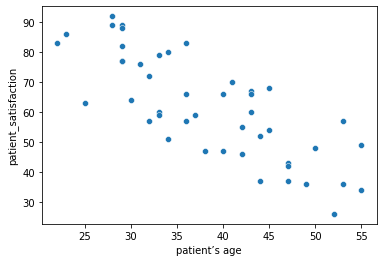

In [3]:
# scatter plot for X1 vs Y
sns.scatterplot(x='patient’s age', y='patient_satisfaction', data=df);

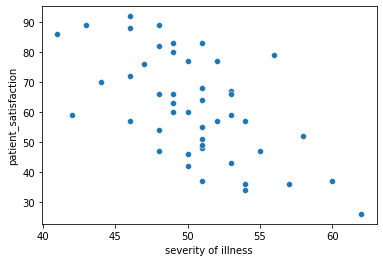

In [4]:
# scatter plot for X2 vs Y
sns.scatterplot(x='severity of illness', y='patient_satisfaction', data=df);

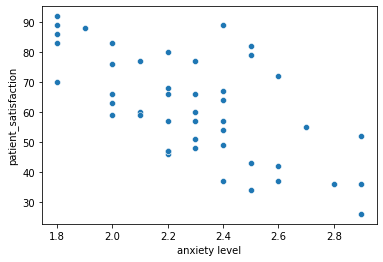

In [5]:
# scatter plot for X3 vs Y
sns.scatterplot(x='anxiety level', y='patient_satisfaction', data=df);

#### Conclusion: Compared to X2 and X3, X1 is more negaive to Y

### b. Obtain the scatter plot matrix and the correlation matrix. Interpret these and state your principal findings.

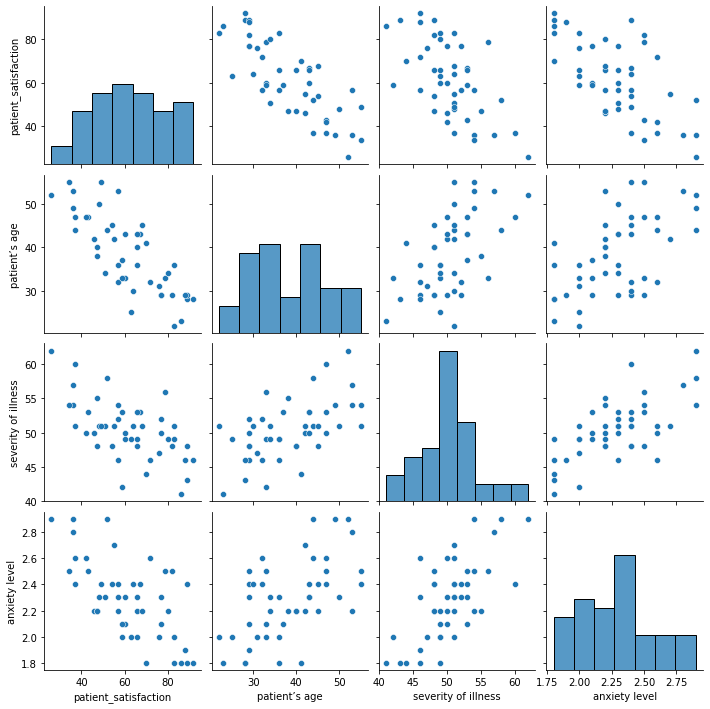

In [6]:
#the scatter plot matrix 
sns.pairplot(data=df);

In [7]:
# the correlation matrix
matrix = df.corr()
print(matrix)

                      patient_satisfaction  patient’s age  \
patient_satisfaction              1.000000      -0.786756   
patient’s age                    -0.786756       1.000000   
severity of illness              -0.602942       0.567950   
anxiety level                    -0.644591       0.569677   

                      severity of illness  anxiety level  
patient_satisfaction            -0.602942      -0.644591  
patient’s age                    0.567950       0.569677  
severity of illness              1.000000       0.670529  
anxiety level                    0.670529       1.000000  


Information from these diagnostic aids: From the correlation matrix, we can conclude that Y (patient satisfaction) is negatively correlated to X1 (patient’s age), X2 (severity of illness) and X3 (anxiety level). Moreover, The correlation is stronger between Y and X2 (-0.6) than between Y and X1 (-0.78) and between Y and X3 (-0.64)

### c. Calculate coefficients in regression model for three predictor variables and state the estimated regression function. How is b_2 interpreted here?

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols('y ~ x1+x2+x3', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     30.05
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           1.54e-10
Time:                        18:21:27   Log-Likelihood:                -169.36
No. Observations:                  46   AIC:                             346.7
Df Residuals:                      42   BIC:                             354.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    158.4913     18.126      8.744      0.000     121.912     195.071
x1            -1.1416      0.215     -5.315      0.000      -1.575      -0.708
x2            -0.4420      0.492     -0.898      0.374      -1.435       0.551
x3           -13.4702      7.100     -1.897      0.065     -27.798       0.858
==============================================================================
Omnibus:                        5.219   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.074
Skew:                          -0.098   Prob(JB):                        0.354
Kurtosis:                       1.978   Cond. No.                         782.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Coefficients**
* b0 = 158.4913
* b1 = -1.1416
* b2 = -0.442
* b3 = -13.4702

**Regression function:**
Y_hat = beta[0] + beta[1]*X1 + beta[2]*X2 + beta[3]*X3
#### Y_hat = 158.4913 + (-1.1416)X1 + (-0.442)X2 + (-13.4702)X3

b2 = −0.442; for every unit increase in the illness severity
index, mean satisfaction is reduced by 0.442 units.


### d. Obtain the residuals and prepare a box plot of the residuals. Do there appear to be any outliers?

In [9]:
resid = results.resid

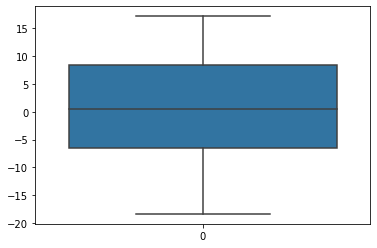

In [10]:
sns.boxplot(data=resid);

No, because the residuals are evenly distributed and centered around 0
The boxplot shown above shows that there are no outliers in this data and that the number of positive and negative residuals is approaching equality. The residuals are additionally uniformly distributed and centered at 0. As a result, we may say that the regression model accurately predicts the data.

### e. Plot the residuals against Y ̂ , each of the predictor variables, and each two-factor interaction term on separate graphs. Also prepare a normal probability plot. Interpret your plots and summarize your findings.

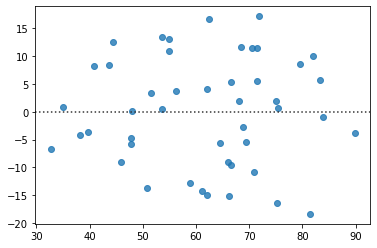

In [11]:
#Y_hat
Y_hat = results.predict()
sns.residplot(x=Y_hat, y=resid, data=df);

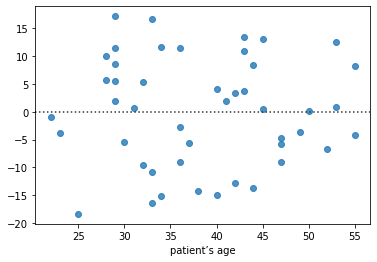

In [12]:
# x1
sns.residplot(x=x1, y=resid, data=df);

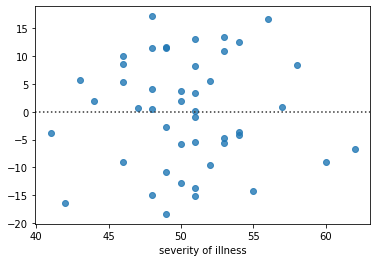

In [13]:
# x2
sns.residplot(x=x2, y=resid, data=df);

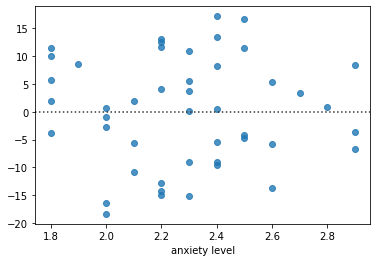

In [14]:
# x3
sns.residplot(x=x3, y=resid, data=df);

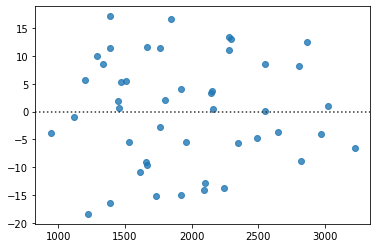

In [15]:
# X1X2
X1X2 = x1*x2
sns.residplot(x=X1X2, y=resid, data=df);

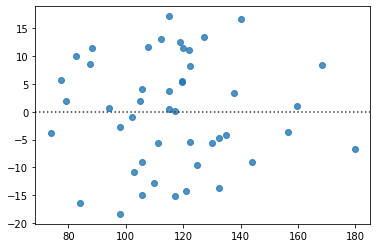

In [16]:
#X2X3
X2X3 = x2*x3
sns.residplot(x=X2X3, y=resid, data=df);

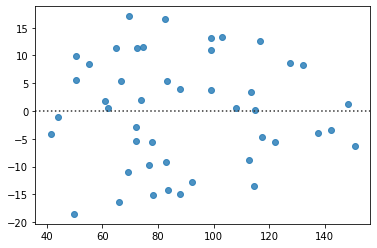

In [17]:
# X1X3
X1X3 = x1*x3
sns.residplot(x=X1X3, y=resid, data=df);

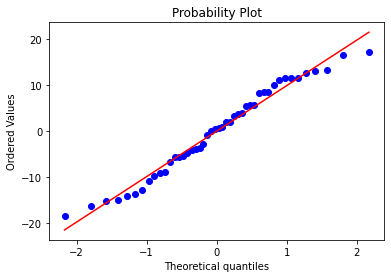

In [18]:
import scipy.stats as stats
stats.probplot(resid, dist="norm", plot = plt);
plt.show();

 There is a slight increase in variability for ei vs. Y_hat, but overall it looks okay. The normal probability plot of the
residuals looks fine (relatively straight). The plots of the
residuals vs. each predictor and each two-way interaction all
look appropriately “random.”

### f. Test whether there is a regression relation; use α = .10. State the alternatives, decision rule, and conclusion. What does your test imply about β_1,β_2,β_3? What is the P-value of the test?

In [40]:
sse = np.sum((results.fittedvalues - df.patient_satisfaction)**2)
print(sse)
ssr = np.sum((results.fittedvalues - df.patient_satisfaction.mean())**2)
print(ssr)
p=4
n = len(y)
MSR = ssr/(p-1)
MSE = sse/(n-p)
print(MSR,MSE)

4248.840681833575
9120.463665992784
3040.154555330928 101.1628733769899


In [38]:
Y_Y = np.dot(y.T,y)

J = np.ones((len(x1)))

SSTO = Y_Y - (1/len(x1))*(y.T@J)**2
SSE = np.dot(resid.T,resid)
SSR = SSTO - SSE

In [39]:
p=4
n = len(y)
MSR = SSR/(p-1)
MSE = SSE/(n-p)
print(MSR,MSE)

3040.154555330835 101.16287337698991


#### F Test for Regression Relation
###### Hypothesis:
* H0: β1 = β2 = β3 = 0
* Hα: not all βi = 0 (i=1,2,3)
###### test statistic: F* = MSR/MSE 
###### The decision rule to control the Type I error at α is:
* If F∗ ≤ F(1 − α; p − 1, n − p), conclude H0
* If F∗ > F(1 − α; p − 1, n − p), conclude Ha

In [21]:
Fstar = MSR/MSE
print(Fstar)
f = stats.f.ppf(q=1-0.1,dfn=p-1,dfd=n-p)
print(f)

30.05207793971605
2.2190585583443494


#### Since F*= 30.05 > F = 2.21, we conclude Ha

In [22]:
p =1- stats.chi2.cdf(x=(ssr/2) / ((sse/n)**2),df=1)
print(p)

0.4647138978790545


**p-value of the test is 0.46**

### g. Conduct the Breusch-Pagan test for constancy of the error variance, assuming log(σ_i^2)=γ_0+γ_1 X_i1+γ_2 X_i2+γ_3 X_i3; use α = .01. State the alternatives, decision rule, and conclusion.

In [33]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
fit = smf.ols('y ~ x1+x2+x3', data=df).fit()
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 2.558325446496668),
 ('p-value', 0.4648425187864703),
 ('f-value', 0.824474576983472),
 ('f p-value', 0.48779314523870854)]

#### The Breusch-Pagan test gives p = 0.46, no evidence of non-constant variance.